<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import Data</a></span><ul class="toc-item"><li><span><a href="#Define-Mapping-Dictionaries" data-toc-modified-id="Define-Mapping-Dictionaries-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Define Mapping Dictionaries</a></span></li><li><span><a href="#Define-the-Import-Function" data-toc-modified-id="Define-the-Import-Function-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Define the Import Function</a></span></li><li><span><a href="#Confirm-the-imported-data" data-toc-modified-id="Confirm-the-imported-data-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Confirm the imported data</a></span></li></ul></li></ul></li><li><span><a href="#Distribution-of-Names" data-toc-modified-id="Distribution-of-Names-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Distribution of Names</a></span><ul class="toc-item"><li><span><a href="#Baby-Names-and-the-Power-Law-Distribution" data-toc-modified-id="Baby-Names-and-the-Power-Law-Distribution-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Baby Names and the <span style="color:#ff6347">Power Law Distribution</span></a></span></li></ul></li><li><span><a href="#US-Birth-Rate-Analysis" data-toc-modified-id="US-Birth-Rate-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>US Birth Rate Analysis</a></span><ul class="toc-item"><li><span><a href="#Overall-Birth-Trend" data-toc-modified-id="Overall-Birth-Trend-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Overall Birth Trend</a></span></li><li><span><a href="#States-Ranking" data-toc-modified-id="States-Ranking-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>States Ranking</a></span></li><li><span><a href="#Birth-Rate-flactuations-Throughout-the-Years" data-toc-modified-id="Birth-Rate-flactuations-Throughout-the-Years-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Birth Rate flactuations Throughout the Years</a></span><ul class="toc-item"><li><span><a href="#Top-5" data-toc-modified-id="Top-5-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Top 5</a></span></li><li><span><a href="#All-Rankings-Birds-Eye-View" data-toc-modified-id="All-Rankings-Birds-Eye-View-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>All Rankings Birds-Eye View</a></span></li></ul></li><li><span><a href="#Overall-Top-5-States-with-highest-Births" data-toc-modified-id="Overall-Top-5-States-with-highest-Births-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Overall Top 5 States with highest Births</a></span></li></ul></li><li><span><a href="#US-Baby-Names-Analysis" data-toc-modified-id="US-Baby-Names-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>US Baby Names Analysis</a></span></li></ul></div>

# Preprocessing

## Import Packages

In [252]:
# Packages Imports
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.patches import Arc
# import powerlaw
import seaborn as sns
from matplotlib.offsetbox import AnchoredText
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.ticker as ticker
from matplotlib.patheffects import withStroke
from matplotlib.colors import ListedColormap, BoundaryNorm,LinearSegmentedColormap
from matplotlib import lines, patches

## Import Data

### Define Mapping Dictionaries

In [2]:
state_dict = {
    'AL': 'Alabama','AK': 'Alaska','AZ': 'Arizona','AR': 'Arkansas',
    'CA': 'California','CO': 'Colorado','CT': 'Connecticut','DE': 'Delaware',
    'FL': 'Florida','GA': 'Georgia','HI': 'Hawaii','ID': 'Idaho',
    'IL': 'Illinois','IN': 'Indiana','IA': 'Iowa','KS': 'Kansas',
    'KY': 'Kentucky','LA': 'Louisiana','ME': 'Maine','MD': 'Maryland',
    'MA': 'Massachusetts','MI': 'Michigan','MN': 'Minnesota','MS': 'Mississippi',
    'MO': 'Missouri','MT': 'Montana','NE': 'Nebraska','NV': 'Nevada',
    'NH': 'New Hampshire','NJ': 'New Jersey','NM': 'New Mexico','NY': 'New York',
    'NC': 'North Carolina','ND': 'North Dakota','OH': 'Ohio','OK': 'Oklahoma',
    'OR': 'Oregon','PA': 'Pennsylvania','RI': 'Rhode Island','SC': 'South Carolina',
    'SD': 'South Dakota','TN': 'Tennessee','TX': 'Texas','UT': 'Utah',
    'VT': 'Vermont','VA': 'Virginia','WA': 'Washington','WV': 'West Virginia',
    'WI': 'Wisconsin','WY': 'Wyoming', "DC": "Columbia"
}

font = {'family': 'Lato', 'weight': 'bold', 'size': 11}

### Define the Import Function

In [3]:
# Read all text files into a single table

def get_data(zip_path):
    with zipfile.ZipFile(zip_path) as zf:
        return  (pd.concat(
                    [pd.read_csv(zf.open(f),
                                 header=None, 
                                 names=['State', 'Gender', 'Year', 'Name', 'Births'])
                     for f in zf.namelist() if f.endswith("TXT")],
                ignore_index=True)
                 .assign(Year = lambda _df : pd.to_datetime(_df.Year,format="%Y")+ pd.offsets.YearEnd(0),
                        State = lambda _df: _df.State.map(state_dict)))

### Confirm the imported data

In [4]:
# Get data from the source folder
zip_path = 'Data/namesbystate.zip'
df = get_data(zip_path)

# Check null values
print(f'Total null values are {df.isna().sum().sum()}')

# Display the first 5 enteries
df

Total null values are 0


,State,Gender,Year,Name,Births
0,Alaska,F,1910-12-31,Mary,14
1,Alaska,F,1910-12-31,Annie,12
2,Alaska,F,1910-12-31,Anna,10
3,Alaska,F,1910-12-31,Margaret,8
4,Alaska,F,1910-12-31,Helen,7
...,...,...,...,...,...
6408036,Wyoming,M,2022-12-31,Lane,5
6408037,Wyoming,M,2022-12-31,Michael,5
6408038,Wyoming,M,2022-12-31,Nicholas,5
6408039,Wyoming,M,2022-12-31,River,5


# Distribution of Names

at first glance it can be shown that the distribution is highly skewed an uneven.

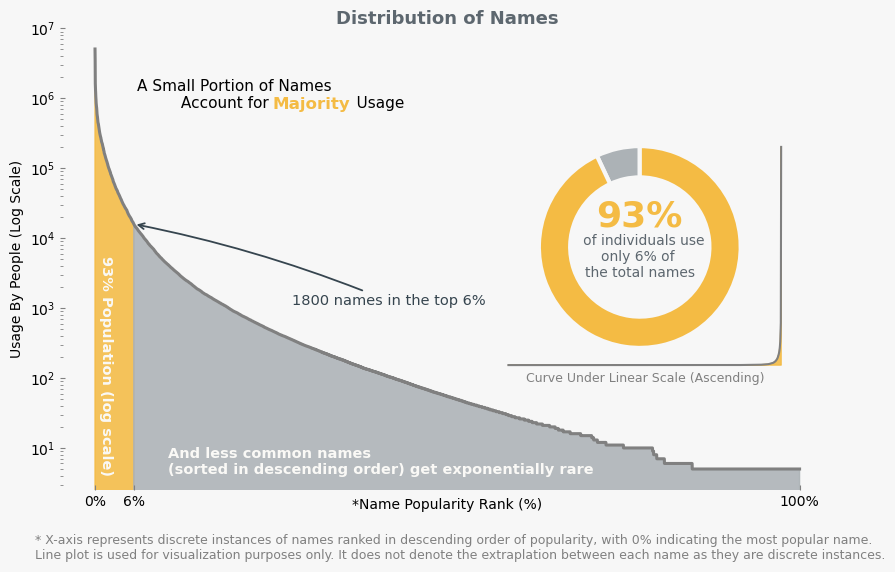

In [5]:
# Transform data
data = df.groupby("Name").Births.sum().sort_values(ascending=False)

# Variables
topN=1800
names = int(round((topN/len(data)),2)*100)
ppl = int((data.nlargest(topN).sum()/data.sum()).round(2)*100)
accent_color = '#F4BB44'

# Canvas
fig, ax = plt.subplots(figsize=(10, 6),facecolor='#F7F7F7')

# Line Plot
ax.set_facecolor('none')
data.plot.line(ax=ax,lw=2.2,color='grey', ylabel='Usage By People (Log Scale)')
ax.set_xlabel("*Name Popularity Rank (%)", labelpad=-8)
line_data = ax.lines[0].get_data()
ax.set_xticks([0,topN,line_data[0][-1]],["0%",f'{names}%',"100%"])
ax.set_yscale("log")
ax.tick_params(axis='both',which='both', color='grey',direction='in')
sns.despine(left=True,bottom=True,ax=ax)
ax.fill_between(line_data[0],line_data[1],where=(line_data[0]<=topN),alpha=0.88,color="#F4BB44")
ax.fill_between(line_data[0],line_data[1],where=(line_data[0]>topN),alpha=0.88,color="#ACB2B6")

# Pie Chart
sizes = [100-ppl, ppl]
colors = ['#ACB2B6',accent_color]
ax2 = fig.add_axes([0.52, 0.33, 0.37, 0.37])
ax2.pie(sizes, colors=colors, startangle=90, wedgeprops={"edgecolor" : "#F7F7F7", 'linewidth':3 ,"width":0.31})
ax2.axis('equal')  # Equal aspect ratio ensures a circular pie chart

# Line Plot (Small)
ax3 = fig.add_axes([0.56, 0.3, 0.3, 0.4],facecolor='none')
sns.lineplot(data=data,x=line_data[0],y=line_data[1],ax=ax3,color='grey')
ax3.set(yticks=[], xticks=[])
ax3.set_xlabel("Curve Under Linear Scale (Ascending)", size=9, labelpad=-3,color="grey")
sns.despine(ax=ax3, left=True, bottom=True)
ax3.fill_between(line_data[0], line_data[1], alpha=0.88, color=np.where(line_data[0] <= topN, accent_color, "#ACB2B6"))
ax3.invert_xaxis()

#Annotations
subtitle = "A Small Portion of Names\n         Account for                  Usage"
ax.set_title("Distribution of Names", fontsize=13, fontweight='bold',pad=0,color='#5D676F')
ax.text(0.1, 0.855, subtitle, fontsize=11, fontweight='normal',
        horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
ax.text(0.275, 0.85, "Majority", fontsize=12, fontweight='bold',
        horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, color=accent_color)
ax.text(0.14, 0.06, "And less common names\n(sorted in descending order) get exponentially rare",
        fontsize=10.5, fontweight='bold',
        horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, color='#FAF9F6')
ax.text(0.05, 0.03, f"{ppl}% Population (log scale)", fontsize=10.5, fontweight='bold',
        horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes, color='#FAF9F6',rotation=-90)

ax2.text(0,0.3,f"{ppl}%",ha='center',va='center',size=26,weight='bold',color=accent_color)
ax2.text(0,-0.1,f"   of individuals use \nonly {names}% of \nthe total names",
         ha='center',va='center',size=10,color='#5D676F')

note = """* X-axis represents discrete instances of names ranked in descending order of popularity, with 0% indicating the most popular name.
Line plot is used for visualization purposes only. It does not denote the extraplation between each name as they are discrete instances."""
ax.text(0.1, -0.01, note, transform=fig.transFigure,
        ha='left', va='bottom', fontsize=9, color='grey');

ax.annotate(f'{topN} names in the top {names}%',
            xy=(topN,line_data[1][topN]), xycoords='data', size=10.5,color ="#36454F",
            xytext=(0.3,0.4), textcoords='axes fraction', ha='left',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.05",lw=1.3,color ="#36454F"));

plt.savefig('demo.png', transparent=True)
        

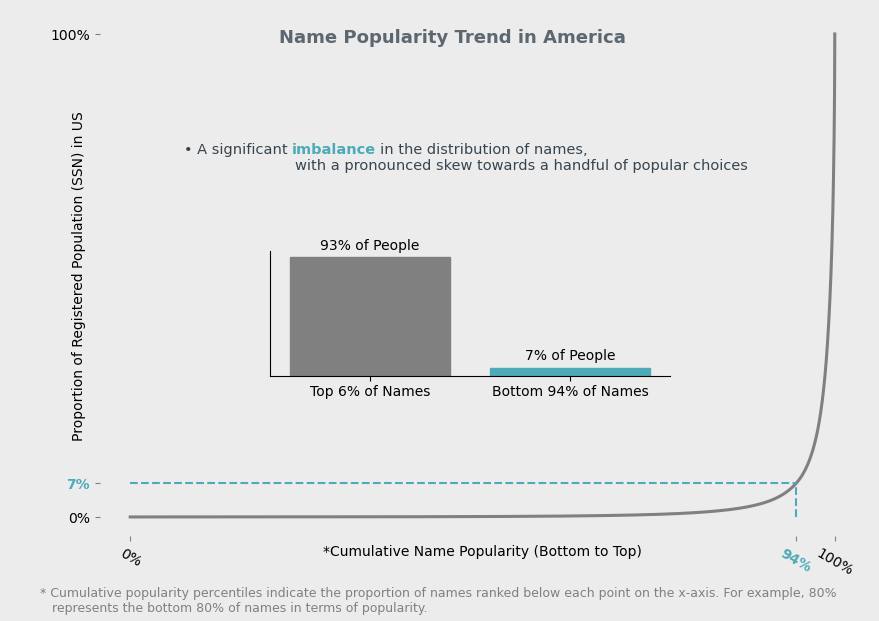

In [6]:
fig2, ax4 = plt.subplots(figsize=(10,6.9), facecolor="#ECECEC")

# Line Plot
ax4.set_facecolor('none')
sns.despine(left=True,bottom=True)
data.sort_values().cumsum().plot(color='grey',ax=ax4,lw=2.2)
ax4.set_xlabel("*Cumulative Name Popularity (Bottom to Top)",labelpad=-24)
ax4.set_ylabel('Proportion of Registered Population (SSN) in US',labelpad=-26)
plt.setp([ax4.get_xticklabels()[1],ax4.get_yticklabels()[1]], color='#4DAAB9',weight='bold')
x,y = ax4.lines[0].get_data()
bottom_ppl = x[-1]-topN
ax4.set_xticks([x[0],bottom_ppl,x[-1]],['0%',f'{100-names}%',"100%"],rotation=-30)
ax4.set_yticks([y[0],y[bottom_ppl],y[-1]],['0%',f'{100-ppl}%',"100%"])
ax4.hlines(y[bottom_ppl],xmin=0,xmax=bottom_ppl,ls='dashed',color="#4DAAB9")
ax4.vlines(bottom_ppl,ymin=0,ymax=y[bottom_ppl],ls='dashed',color="#4DAAB9")
ax4.tick_params(axis='both',direction='in',color="grey")

# Barplot
middle_width = 0.4  
middle_height = 0.18 

# Calculate the left and bottom coordinates of the middle axes
middle_left = (1 - middle_width) / 2  # Centers the axes horizontally
middle_bottom = 0.35  # Centers the axes vertically

ax5 = fig2.add_axes([middle_left, middle_bottom, middle_width, middle_height],frameon=True,facecolor='none')
ax5.set(xticks=[],yticks=[])

TopNames = (1-(100-names)/100)
top = data.nlargest(int(len(data)*TopNames))
bottom = data.nsmallest(len(data)-int(len(data)*TopNames))
df2=pd.Series([(top.sum()/data.sum())*100,(bottom.sum()/data.sum())*100],[f"Top {names}% of Names",f"Bottom {100-names}% of Names"])
sns.despine(ax=ax5)
sns.barplot(pd.DataFrame(df2).T,ax=ax5)

for i, patch in enumerate(ax5.patches):
    x = patch.get_x()+(patch.get_width()/2)
    y = patch.get_height()
    if i ==0:
        t = f"{ppl}% of People"
        ax5.text(x ,y+6, t,ha='center')
        patch.set_color("grey")
        
    else:
        t = f"{100-ppl}% of People"
        ax5.text(x ,y+6, t,ha='center')
        patch.set_color("#4DAAB9")
        
#Annotations
ax4.text(2.5e3, 2.5e8, "• A significant                    in the distribution of names, \n               "\
        "         with a pronounced skew towards a handful of popular choices", fontsize=10.5,
        horizontalalignment='left', verticalalignment='top',color="#36454F")

ax4.text(7.5e3, 2.5e8 ,"imbalance", fontsize=10.5,
        horizontalalignment='left', verticalalignment='top',color="#4DAAB9",fontweight='bold')

ax4.text(2.3e4,3.2e8, "Name Popularity Trend in America",va="center",size=13,ha="right",weight='bold',color="#5D676F")


note = """* Cumulative popularity percentiles indicate the proportion of names ranked below each point on the x-axis. For example, 80% 
   represents the bottom 80% of names in terms of popularity."""
ax4.text(0.04, 0.01, note, transform=fig.transFigure,
        ha='left', va='bottom', fontsize=9, color='grey');



## Baby Names and the <span style="color: #ff6347;">Power Law Distribution</span>
The power law distribution is a function of the form $f(x) \sim x^{-\alpha}$, where $x$ is the variable and $\alpha$ is the scaling parameter.

Baby names and power law distribution are closely related. Power law distribution is a statistical distribution where the frequency of an event is inversely proportional to its magnitude. In the context of baby names, this means that a few names occur very frequently, while the majority of names occur infrequently.

This pattern is known as the <span style="color: #ad2141;"> <b >Matthew effect"</b></span>, where the popular names become even more popular over time, while the less popular names continue to decline in popularity. This effect is driven by social influence and cultural trends, which can amplify the initial differences in popularity between names.

----
<li>To confirm the power-law hypothesis we need to compare the <em>probability denstiy functions (PDF)</em> <br/><br/>
The PDF of a real-world dataset is usually not known beforehand, so we need to estimate it from the data.One way to do this is to calculate the empirical PDF, which estimates the probability density of the data by counting the number of data points that fall within small intervals or "bins" along the range of the data.

(1e-11, 1.0)

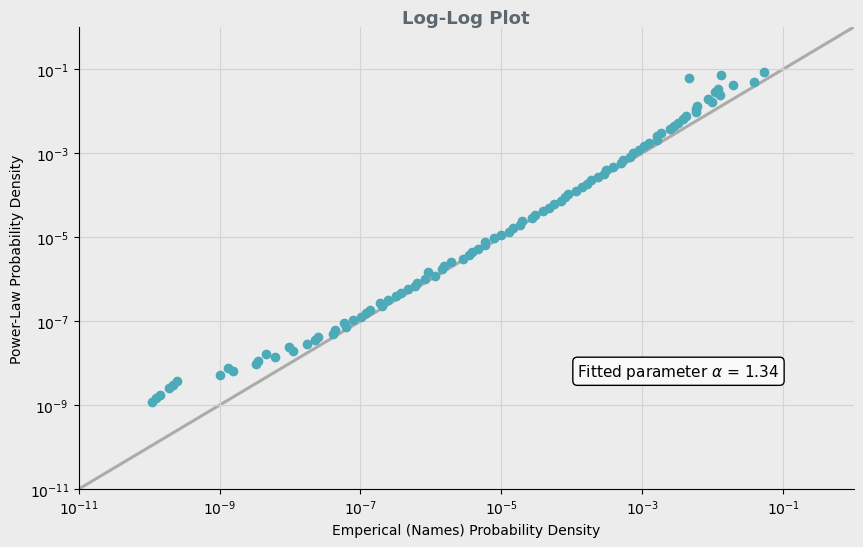

In [7]:
fig3,ax6 = plt.subplots(figsize=(10,6),facecolor="#ECECEC")
ax6.set_facecolor("none")
ax6.set_title("Log-Log Plot",pad=-10,weight='bold',size=13,color='#5D676F')

# Creates 100 logarithmically spaced bins between the minimum and the maximum values of the data. 
# This ensures that the bins are equally spaced on a logarithmic scale, which is important for analyzing power law distributions.

bins = np.logspace(np.log10(data.min()), np.log10(data.max()), 100)
counts, edges = np.histogram(data, bins=bins, density=True)
x = (edges[:-1] + edges[1:]) / 2

# This formula is derived from the log-likelihood function for a power law distribution, which is given by:

# log_likelihood = -n * np.log(alpha) - (1 + alpha) * np.sum(np.log(data / xmin))

# where n is the number of observations in the data, alpha is the scaling parameter to be estimated, data is the dataset,
# and xmin is the minimum value at which the power law behavior starts.

# The formula alpha = 1 + len(data) / np.sum(np.log(data / data.min())) is obtained by setting the derivative
# of the log-likelihood function with respect to alpha equal to zero and solving for alpha.

# fit the data to a power law distribution

alpha = 1 + len(data) / np.sum(np.log(data / data.min()))
y = x ** -alpha

ax6.scatter(counts,y,color="#4DAAB9",zorder=2)
ax6.set_xscale("log")
ax6.set_yscale("log")
ax6.set_xlabel("Emperical (Names) Probability Density")
ax6.set_ylabel("Power-Law Probability Density")
ax6.plot([-1, 1], [-1, 1], color='grey', label='45-Degree Line',lw=2.2,zorder=1,alpha=0.6)
sns.despine(ax=ax6)
plt.grid(zorder=0,color="#D3D3D3")
ax6.text(1.2e-4,0.5e-8,rf"Fitted parameter $\alpha$ = {round(alpha,2)}",
         fontsize=11, bbox=dict(facecolor='#f9f9f9', edgecolor='black', boxstyle='round,pad=0.3'))

ax6.set_xlim(1e-11,1e-0)
ax6.set_ylim(1e-11,1e-0)

# US Birth Rate Analysis

## Overall Birth Trend

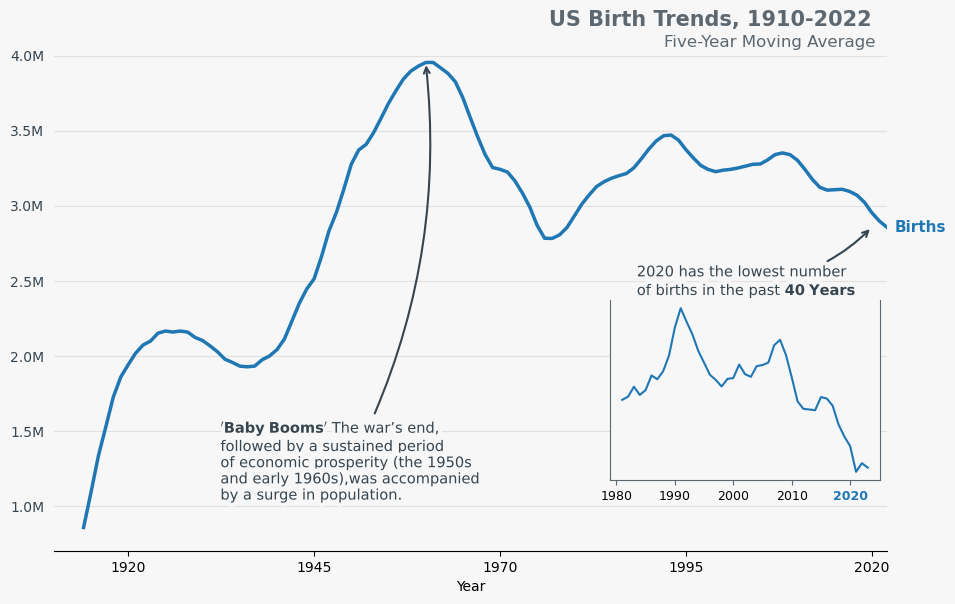

In [42]:
# Transform Data - 5 year moving average to analyize the trend

# Canvas
fig, ax = plt.subplots(figsize=(10, 6),facecolor='#F7F7F7')
ax.set_facecolor("none")
rolling_mean = df.groupby("Year").sum(numeric_only=True).rolling(5).mean()

# Plot
rolling_mean.plot(figsize=(9,6),lw=2.5,ax=ax)
sns.despine(left=True)
plt.legend().remove()
plt.tight_layout()

# Annotate
plt.text(50,rolling_mean.iloc[-1]+1.38e6, "US Birth Trends, 1910-2022",va="center",size=15,ha="right",weight='bold',color="#5D676F")
plt.text(22,rolling_mean.iloc[-1]+1.23e6, "Five-Year Moving Average",va="center",size=12,color="#5D676F")
plt.text(53,rolling_mean.iloc[-1], "Births",color = "#1f77b4",weight="bold",va="center",size=11)


# plt.title("US Birth Trends", loc='right',weight="bold",pad=0)
path_effects=[withStroke(linewidth=6, foreground="#F7F7F7")]
ax.annotate(r"$\bf{'Baby^ Booms'}$"+
    " The war’s end, \nfollowed by a sustained period \n\
of economic prosperity (the 1950s \nand early 1960s),\
was accompanied \nby a surge in population.",
            xy=(-10,rolling_mean.max()), xycoords='data', size=10.5,color ="#36454F",
            xytext=(0.2,0.1), textcoords='axes fraction', ha='left',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.15",lw=1.5,color ="#36454F"),
           path_effects=path_effects);


ax.annotate("2020 has the lowest number\n"+r"of births in the past $\bf{40^ Years}$",
            xy=(50,rolling_mean.loc["1980":].min()), xycoords='data', size=10.5,color ="#36454F",
            xytext=(0.7,0.5), textcoords='axes fraction', ha='left',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2",lw=1.5,color ="#36454F"),
           path_effects=path_effects);




plt.grid(axis="y",color='#D3D3D3',alpha=0.6)


def million_formatter(x,pos):
    return "%.1fM" % (x/1E6)
ax.yaxis.set_major_formatter(million_formatter)
ax.tick_params(which='major',axis="y",width=0,colors="#36454F",labelsize=10)

ax.tick_params(which='minor',axis="x",width=0,colors="#36454F")


ax2=fig.add_axes([0.67,0.215,0.3,0.3])






d=df.groupby("Year").sum(numeric_only=True).loc['1980':]
sns.lineplot(d,ax=ax2,legend=False)
# sns.despine(ax=ax2,left=True)
ax2.set_facecolor("#F7F7F7")
ax2.set_xticks(ax2.get_xticks()[1::2],ax2.get_xticklabels()[1::2],size=9)
ax2.set_ylabel("")
ax2.set_yticks([])
ax2.set_xlabel("")
# ax2.axhline(d.min().values,lw=1,color="grey")
ax2.spines["top"].set_visible(False)
ax2.spines[:].set_color("#5D676F")
ax2.tick_params(axis="x",color="#5D676F")
ax2.get_xticklabels()[-1].set_color('#1f77b4')
ax2.get_xticklabels()[-1].set_weight('bold')

## States Ranking
ranking for total birhts each decade

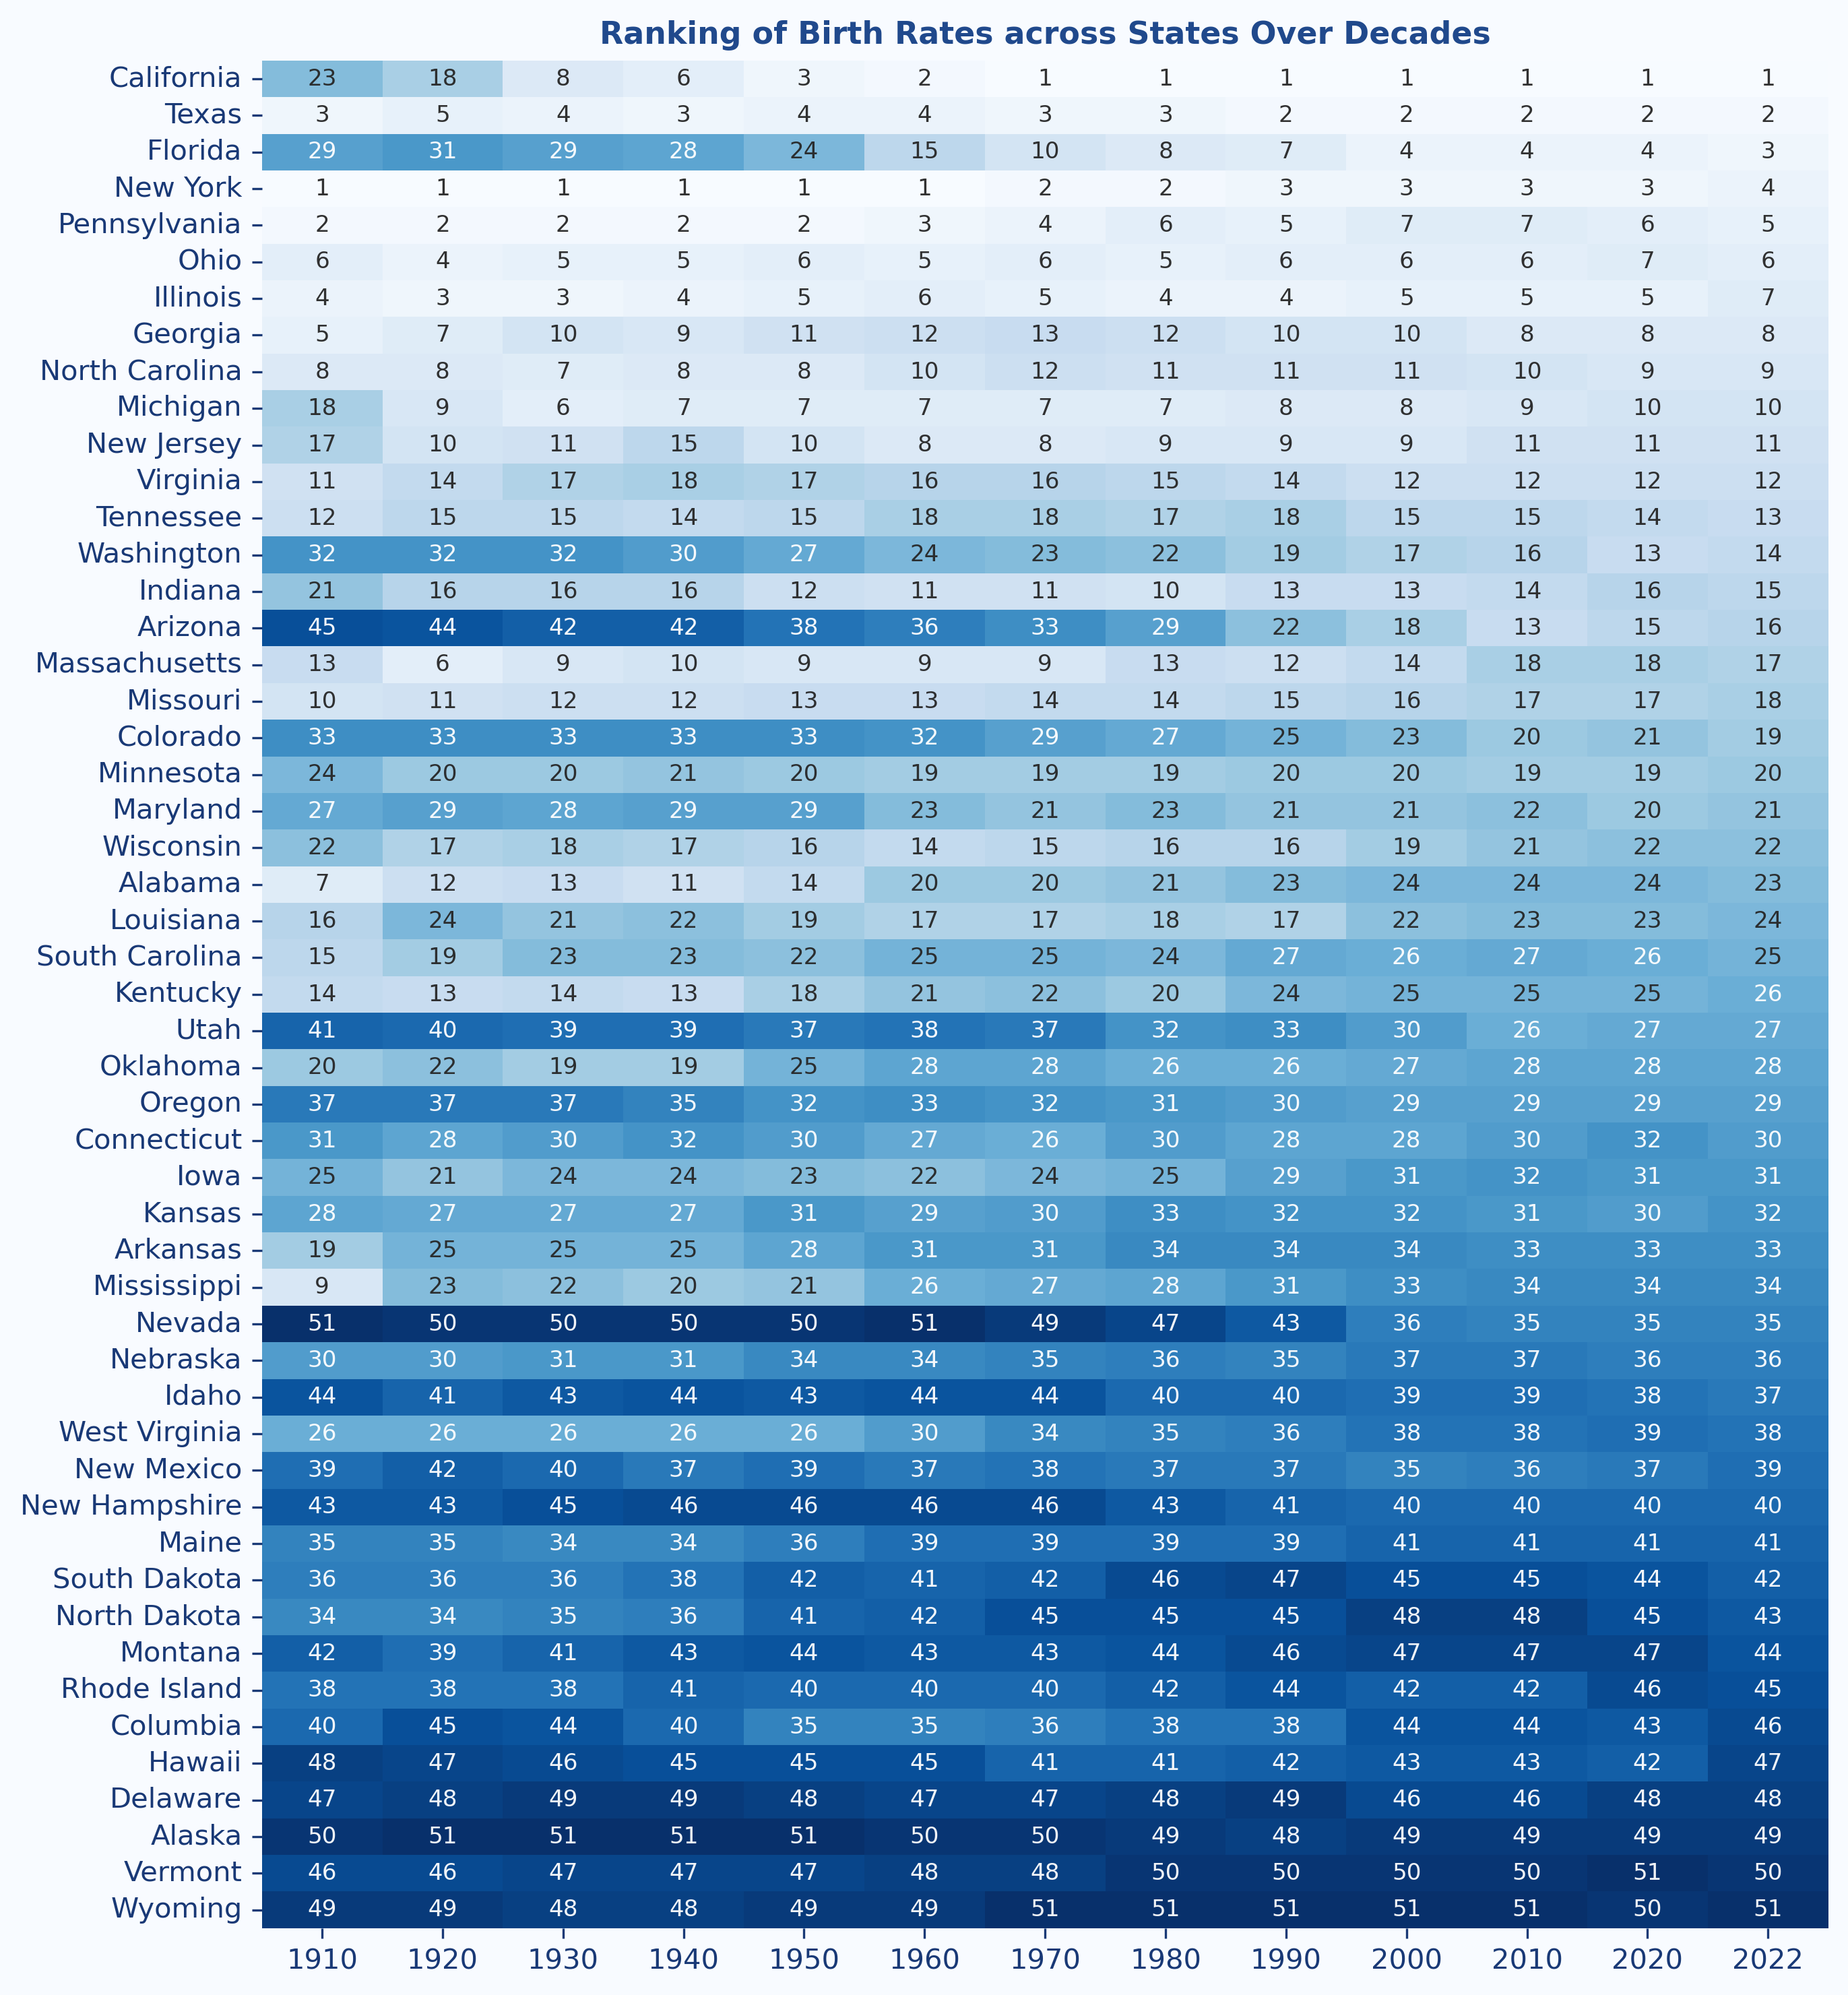

In [37]:
ranked=df.groupby(["State",pd.Grouper(key="Year",freq="10Y")]).Births.sum().unstack(0).rank(axis=1)

fig, ax =plt.subplots(figsize=(10,12),dpi=300,facecolor="#F8FBFF")
ax.set_facecolor("none")
heatmap=sns.heatmap(ranked.T.rename(lambda x:x.year,axis=1).applymap(lambda x:52-int(x)).sort_values(2030),annot=True,
         cbar=False,cmap="Blues",annot_kws={"alpha":0.95,"size":8.2})
plt.title("Ranking of Birth Rates across States Over Decades",weight='bold',size=11,color='#20498C')
ax.set_xticklabels(ax.get_xticklabels()[:-1]+["2022"])
ax.set(xlabel="",ylabel="")
ax.tick_params(colors='#193976')
ax.xaxis.label.set_color('#2B4887')  # Change x-label color to red
ax.yaxis.label.set_color('#2B4887')


## Birth Rate flactuations Throughout the Years

### Top 5

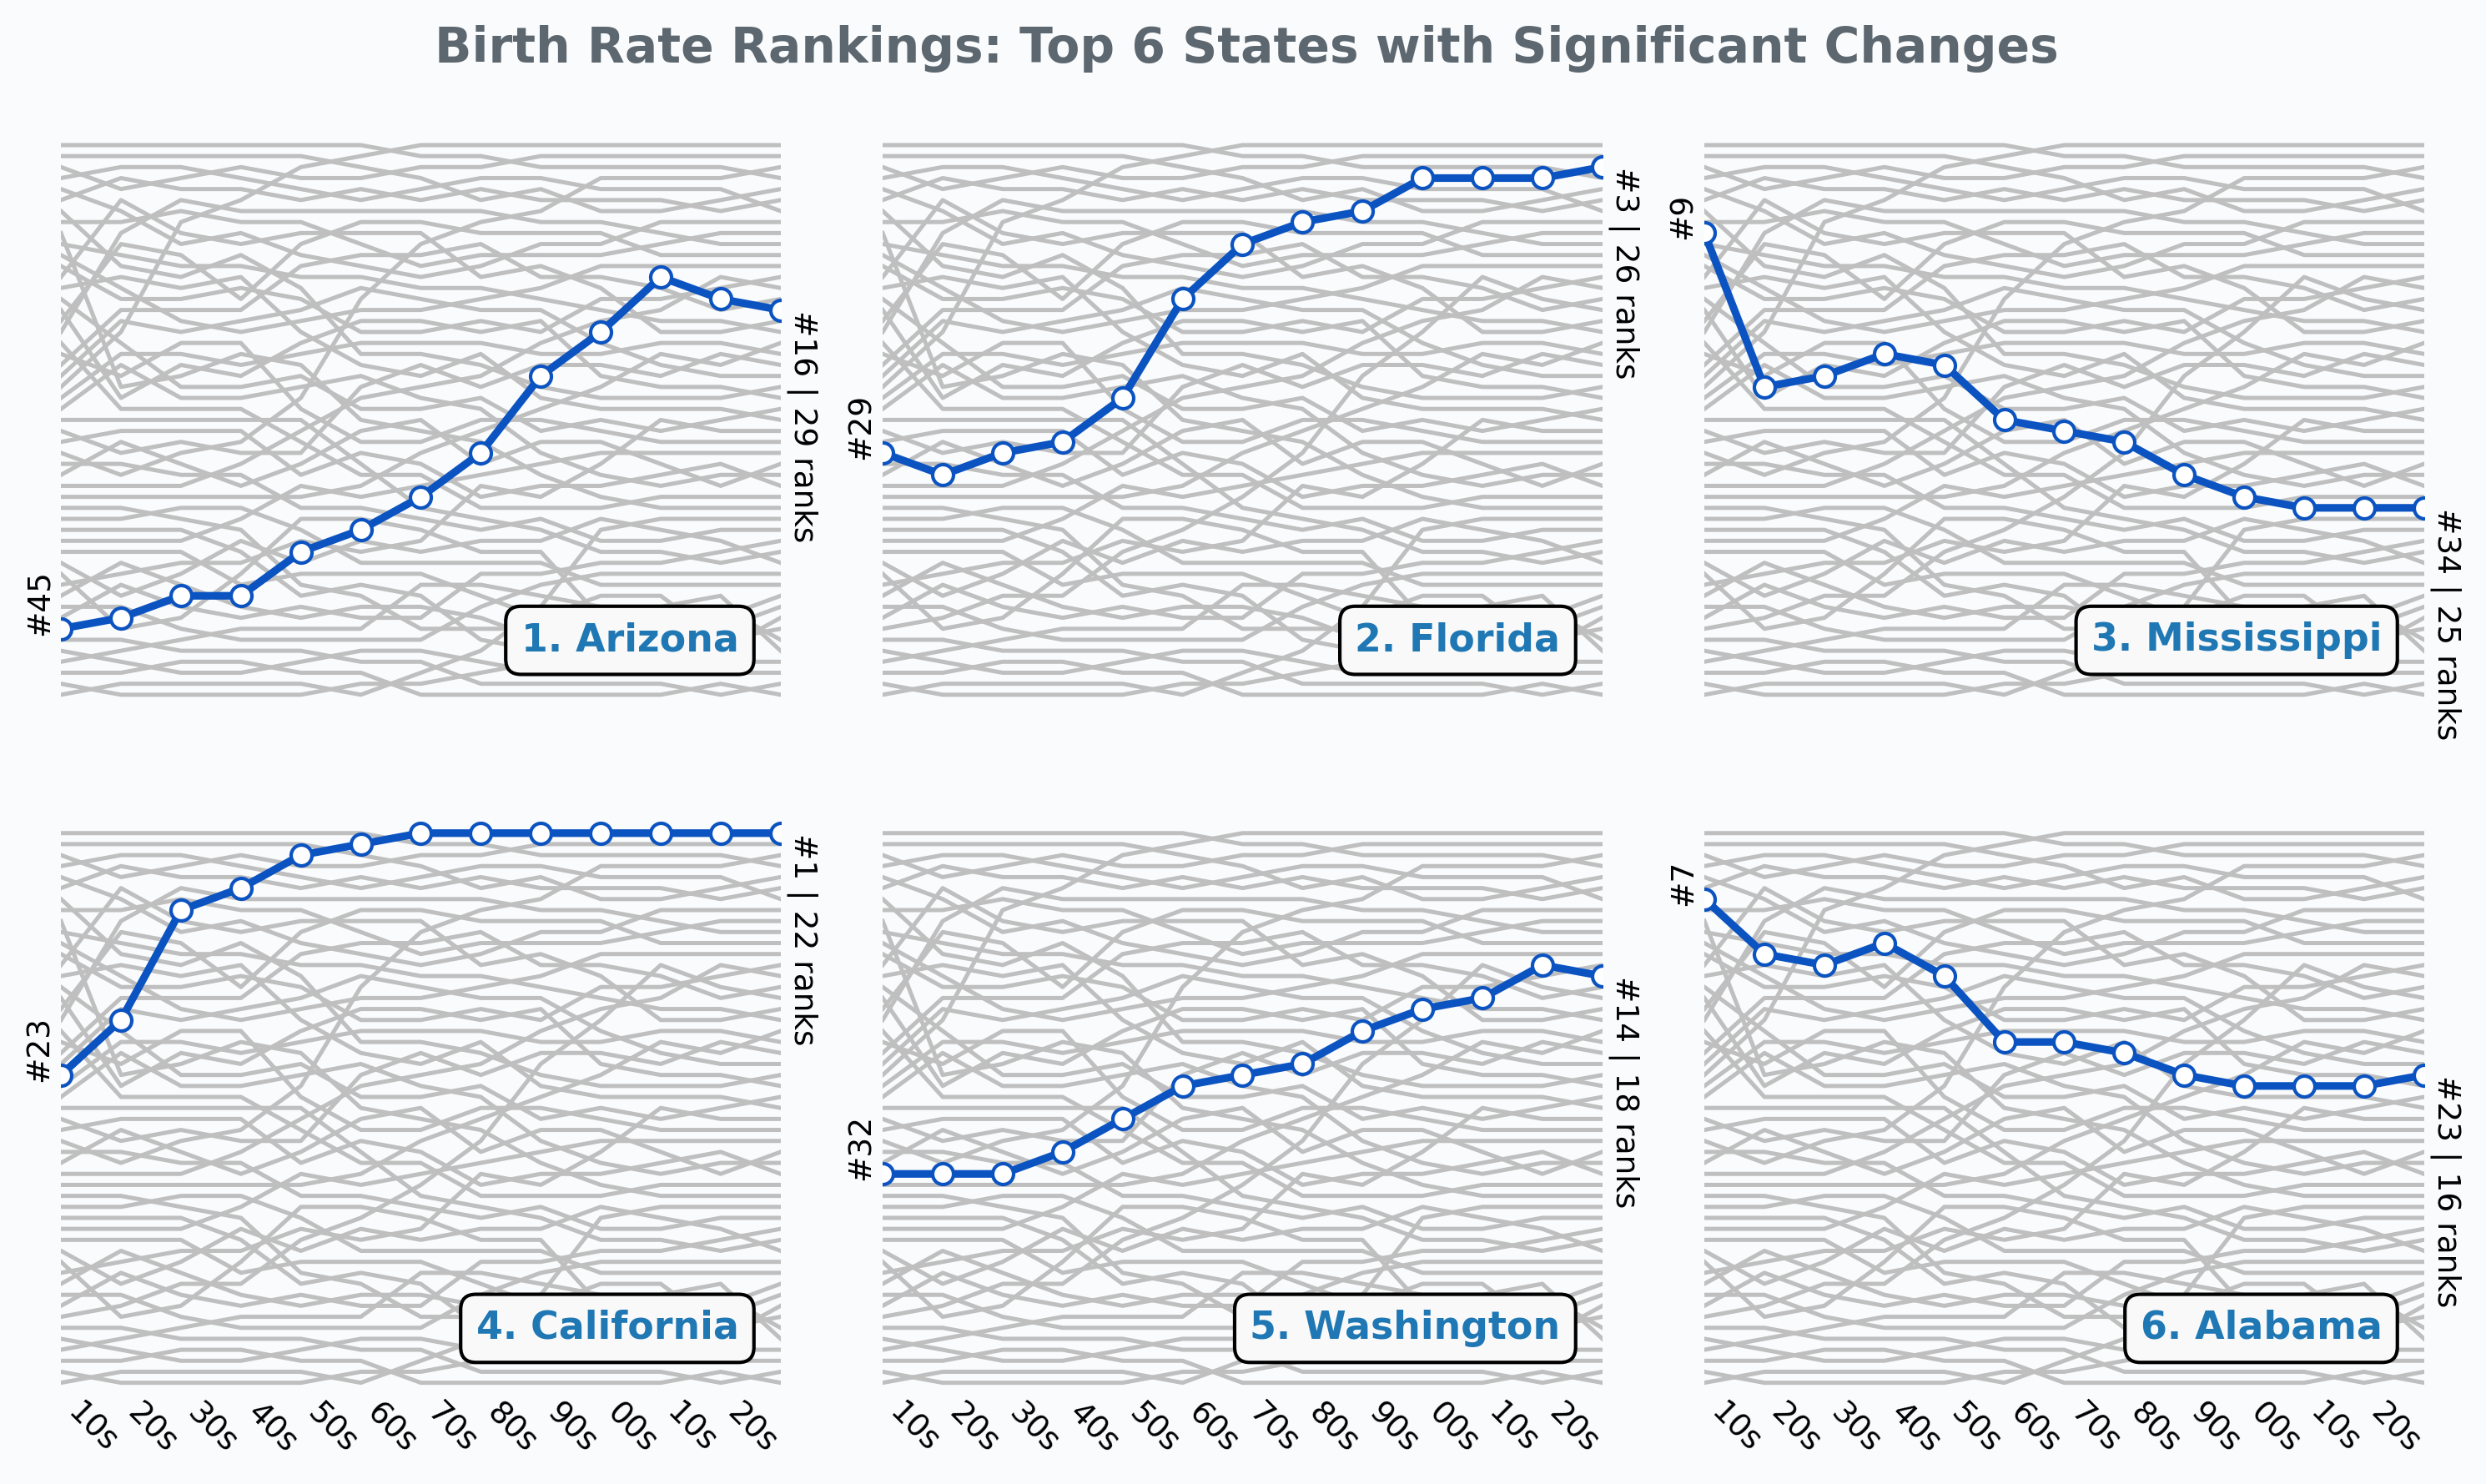

In [40]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(10, 6),facecolor='#f9fbfc',dpi=300)
fig.suptitle('Birth Rate Rankings: Top 6 States with Significant Changes', fontsize=14,weight="bold",color='#5D676F')


n = ranked.apply(lambda x: x[0]-x[-1]).abs().nlargest(6)

for i, (idx, data) in enumerate(n.items()):
    ax = axes.flatten()[i]
    ax.set_facecolor("none")
    ranked[idx].plot(ax=ax, label=idx, color='#0b53c1',xlabel="",marker='o',
                     markersize=6, markerfacecolor='white',zorder=60, linewidth=2.2)
    ranked.drop(idx, axis=1).plot(ax=ax, color='#BFBFBF',xlabel="",zorder=3,lw=1.2)
    
    ax.legend().remove()
    sns.despine(ax=ax)
    ax.set_yticks([])
    ax.set_xticks(list(range(-60, 65, 10)))
    ax.set_xticklabels(["10s", "20s", "30s", "40s", "50s", "60s", "70s", "80s", "90s", "00s", "10s", "20s", ""],rotation=-45,ha='left',size=9)
    ax.tick_params(bottom=False, which='both', pad=-7 ,left=False)
    ax.set_frame_on(False)
    
    y1 = ranked[idx].iloc[0]
    y2 = ranked[idx].iloc[-1]
    ax.text(-66, y1, "#" + str(int(52-y1)),rotation=90,size=9)
    ax.text(61, y2, "#" + str(int(52-y2)) + f' | {int(data)} ranks',rotation=-90,va='top',size=9)
    ax.text(53,5,str(i+1) + ". " + idx,color="#1f77b4",ha='right',weight='bold',
         fontsize=11, bbox=dict(facecolor='#f9f9f9', edgecolor='black', boxstyle='round,pad=0.4'))
    

fig.tight_layout()

### All Rankings Birds-Eye View

## Overall Top 5 States with highest Births

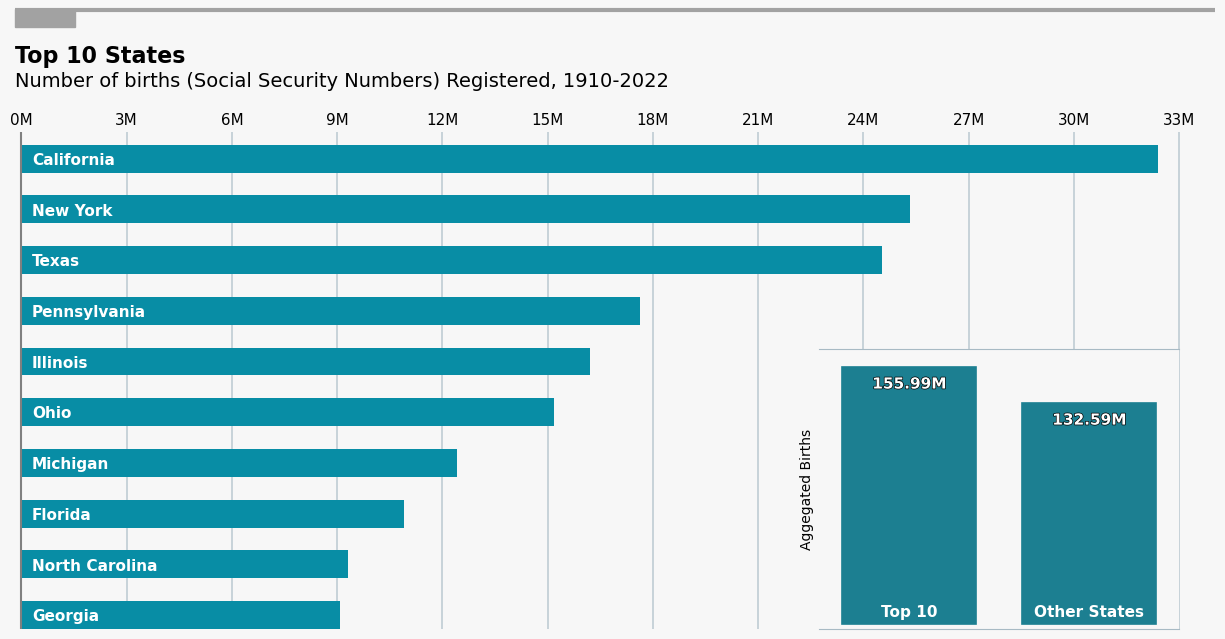

In [29]:
data = df.groupby('State').Births.sum().nlargest(10).sort_values()


fig, ax = plt.subplots(figsize=(12, 7),facecolor='#F7F7F7')
ax.set_facecolor("None")

BLUE = "#076fa2"
RED = "#E3120B"
BLACK = "#202020"
GREY = "#a2a2a2"

ax.barh(data.index, data, height=0.55, align="edge", color="#088da5");
data
ax.set_ylim((0, len(data) - 0.2))
locator = ticker.MaxNLocator(nbins=12)
ax.xaxis.set_major_locator(locator)
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1000000:.0f}M')
ax.xaxis.set_major_formatter(formatter)
ax.set_axisbelow(True)
ax.grid(axis = "x", color="#A8BAC4", lw=1.2,alpha=0.7)
sns.despine(ax=ax,bottom=True)
ax.spines["left"].set_lw(1.5)
ax.spines["left"].set_capstyle("butt")
ax.tick_params(labeltop=True,labelbottom=False,length=0,labelsize=10.9)
ax.yaxis.set_visible(False)
ax.spines["left"].set_color('grey')

# Add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 1], [0.985, 0.985], lw=3, color=GREY, solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.96), 0.05, 0.025, color=GREY))

for i, p in enumerate(ax.patches):
    x = 0
    color = "white"
    y = p.get_y() 
    plt.text(x +3e5,y + 0.5 / 2,data.index[i],va="center",color=color,size=11,weight='bold')

# Add title
fig.text(
    0, 0.91, "Top 10 States", 
    fontsize=16, fontweight="bold"
)
# Add subtitle
fig.text(
    0, 0.875, "Number of births (Social Security Numbers) Registered, 1910-2022", 
    fontsize=14
)


n=10
data = (df.groupby('State').Births.sum().to_frame().reset_index()
        .assign(State = lambda df:df.State.mask(df.State.isin(df.nlargest(n,"Births").State),f"Top {n}")
                .where(df.State.isin(df.nlargest(n,"Births").State),"Other States")).groupby("State").sum()
        .sort_values("Births",ascending=False))

ax2=fig.add_axes([0.67,0.1,0.3,0.4])
ax2.set_facecolor("#F7F7F7")

sns.barplot(data.T,color="#088da5",width=0.8,edgecolor="#F7F7F7",linewidth=6)
# sns.despine(left=True,ax=ax2)
ax2.spines["bottom"].set_color('grey')
ax2.tick_params(left=False,bottom=False,labelbottom=False,labelleft=False)
ax2.set_xlabel("")
ax2.set_ylabel("Aggegated Births")
for i,patch in enumerate(ax2.patches):
    x= patch.get_width()/2 + patch.get_x()
    pad=8e6
    y=patch.get_height()-1.7e7
    path_effects=[withStroke(linewidth=1, foreground="black")]
    ax2.text(x,pad,data.index[i],color="white",ha="center",size=11,weight="bold")
    ax2.text(x,y,str(round(y/1e6,2))+"M",color="white",ha="center",size=11,path_effects=path_effects,weight="bold")
sns.despine(ax=ax2,top=False,left=True)
ax2.spines[:].set_color("#A8BAC4")
fig.subplots_adjust(left=0.005, right=1, top=0.81, bottom=0.1)

# US Baby Names Analysis

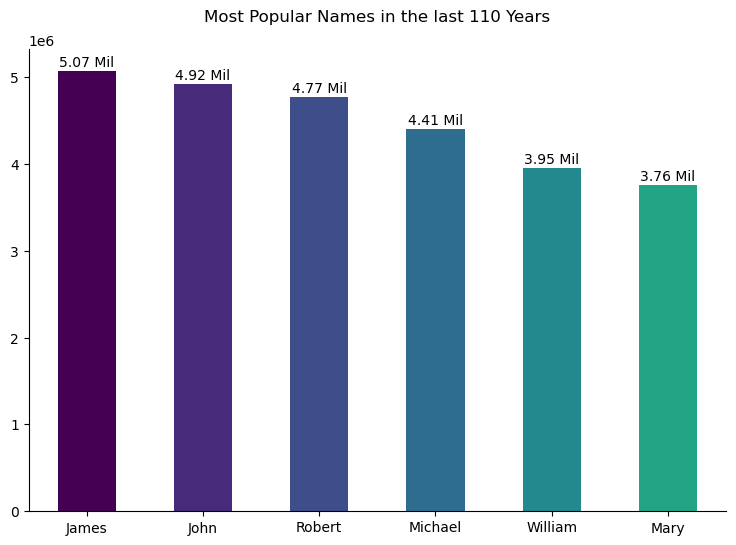

In [28]:
ax = df.groupby('Name').Births.sum().sort_values().nlargest(6).plot.bar(xlabel="",color=[cmap((j*30)) for j in range(6)],figsize=(9,6))
sns.despine()
plt.title("Most Popular Names in the last 110 Years",pad=20)
plt.xticks(rotation=0)

for bar in ax.patches:
    plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.5e5,str(round(bar.get_height()/1000000,2))+" Mil",ha="center")


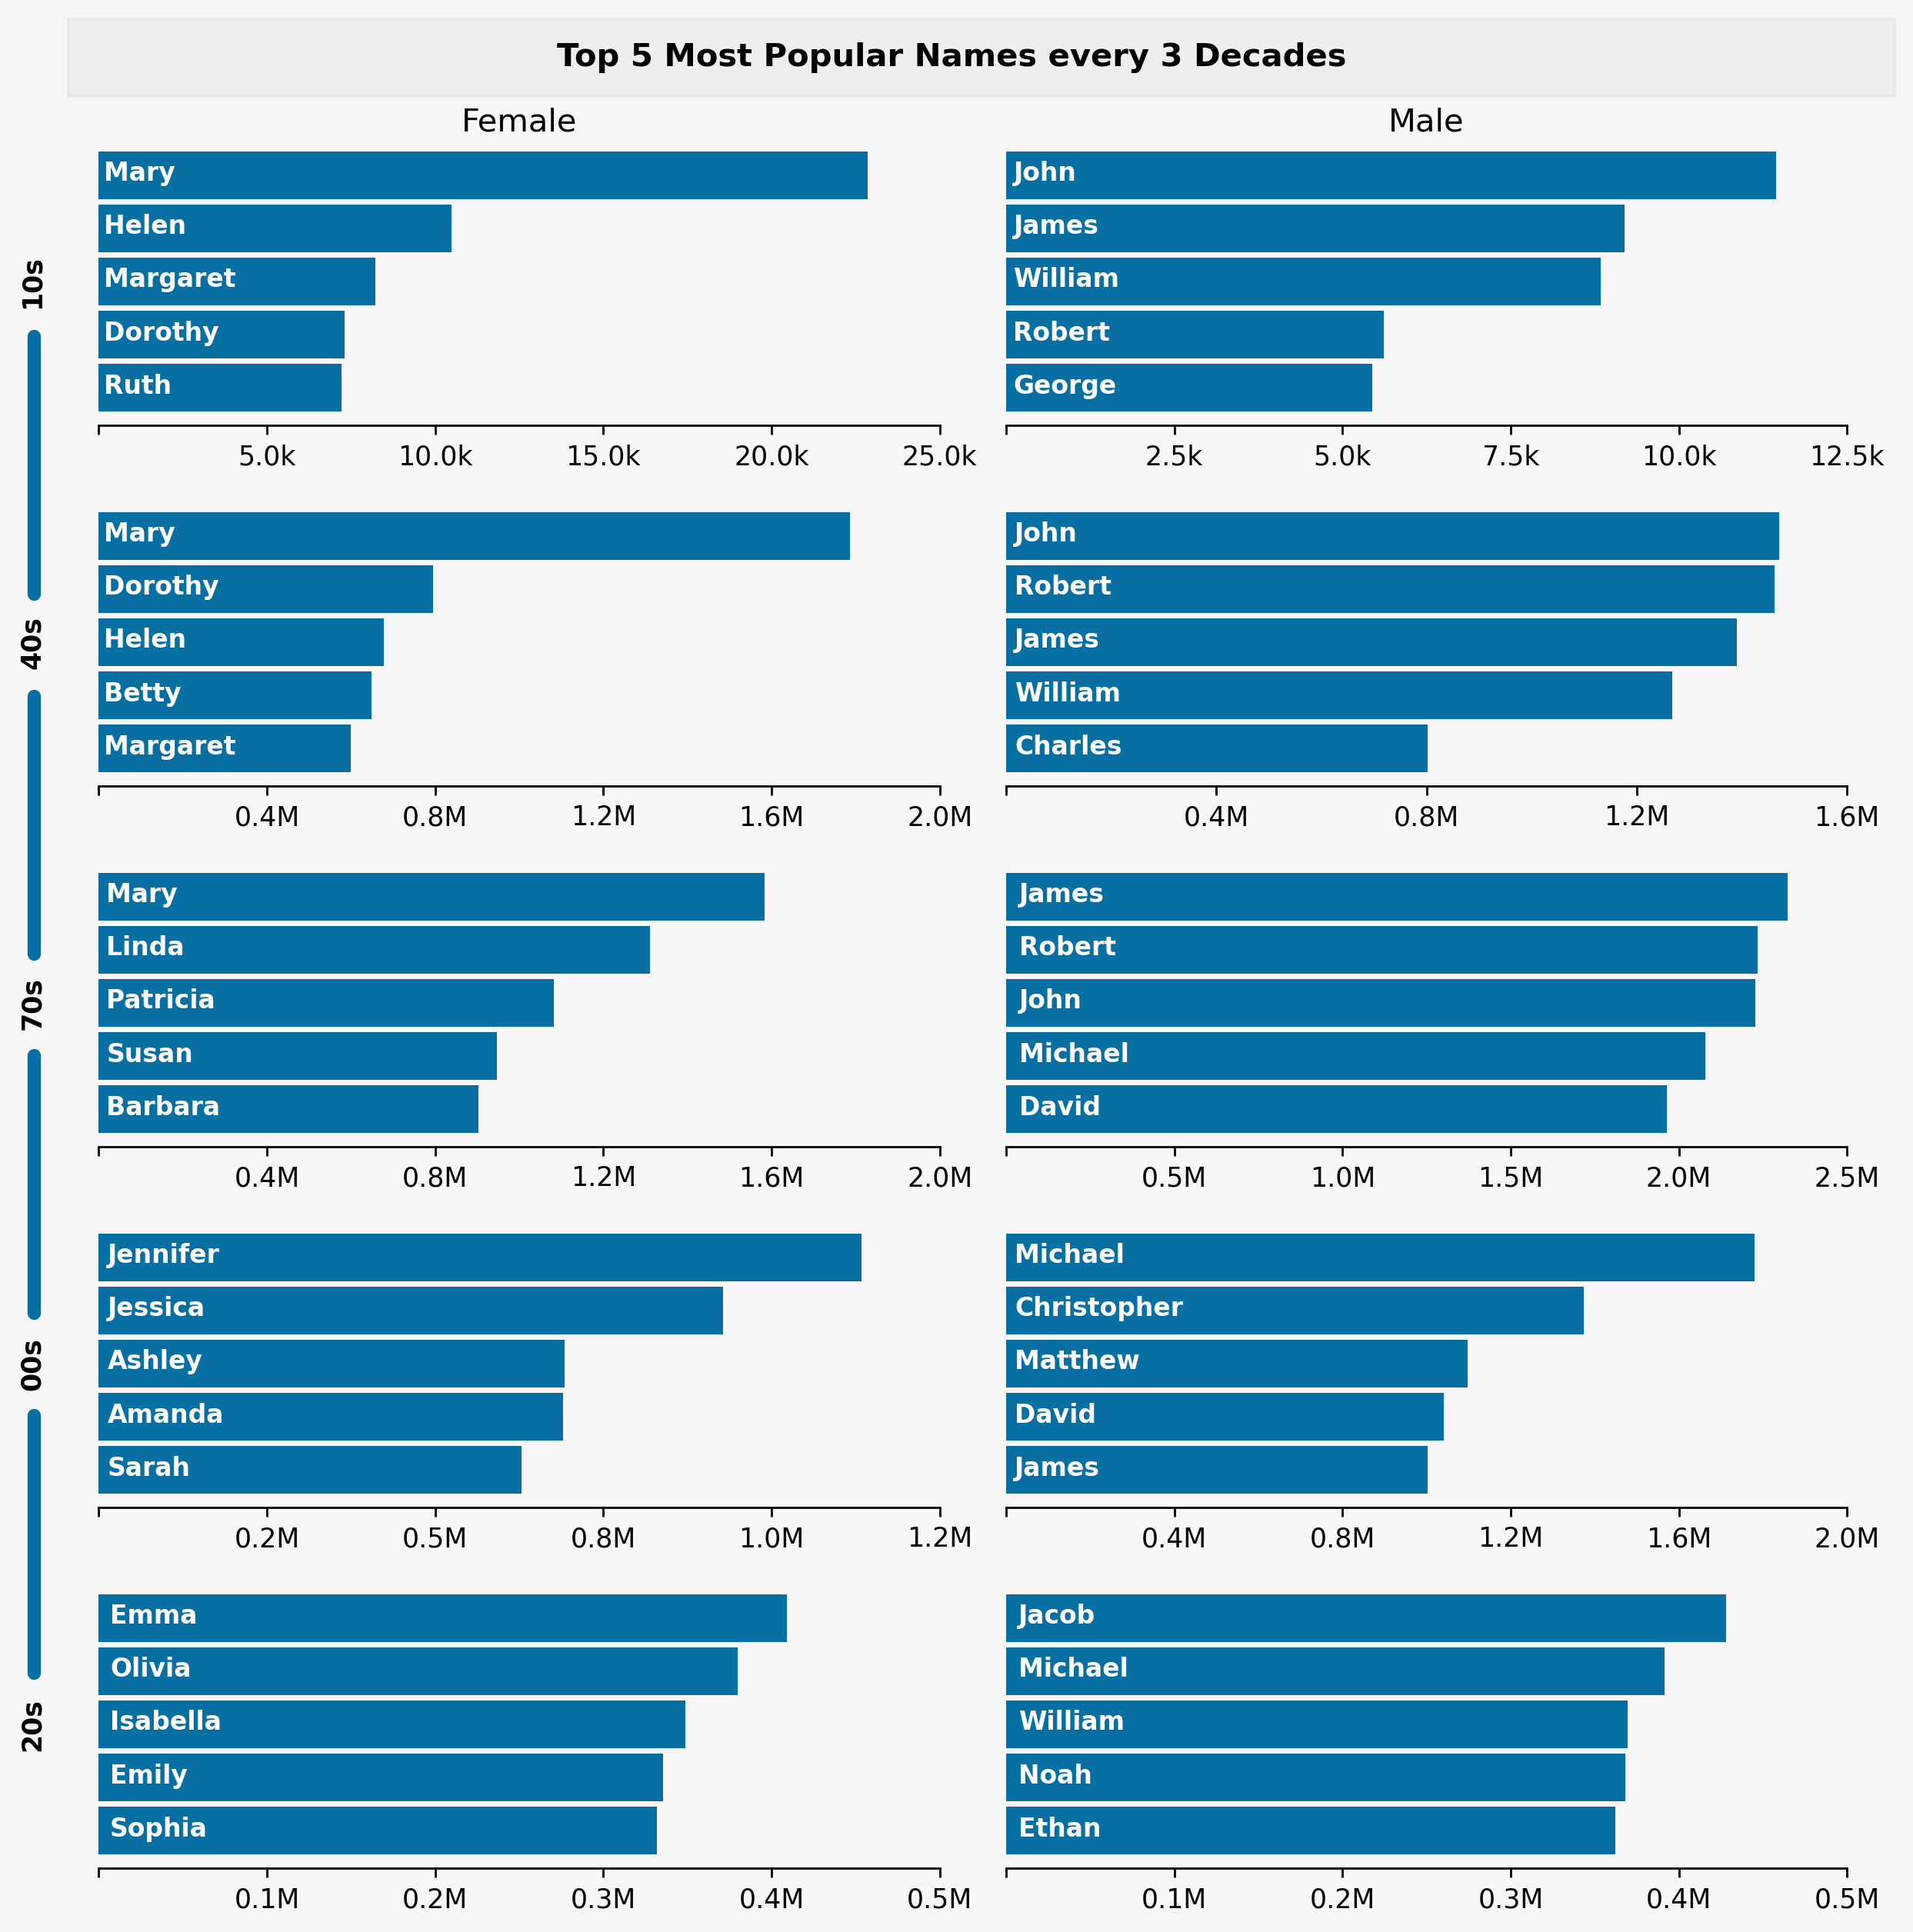

In [302]:
data=df.groupby([pd.Grouper(key="Year",freq="30Y"),"Gender","Name"]).Births.sum().unstack([0,1])

fig,axes = plt.subplots(5,2,figsize=(10,10),dpi=250,facecolor='#F7F7F7')
cmap = plt.get_cmap('viridis')
BLUE = "#076fa2"
for i, (ax, col) in enumerate(zip(axes.flatten(), data.columns)):
    data[col].nlargest(5).sort_values().plot.barh(ax=ax,color=BLUE,width=0.9)
    ax.set_facecolor("None")
    
    locator = ticker.MaxNLocator(nbins=5)
    ax.xaxis.set_major_locator(locator)
    
    formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1000000:.1f}M')
    if i in (0,1):
        formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1000:.1f}k')
    
    ax.xaxis.set_major_formatter(formatter)
    
    
    if i%2==0 and i !=8:
        ax.set_ylabel(col[0].strftime("%Y")[-2:]+"s",weight='bold',labelpad=20)
    elif i==8:
        ax.set_ylabel("20s",weight='bold',labelpad=20)
    
    else:
        ax.set_ylabel("")
    if i==0:
        ax.set_title("Female",pad=0,weight="normal",va="bottom")
    elif i==1:
        ax.set_title("Male",pad=0,weight="normal",va="bottom")
    
    
        
    for j, p in enumerate(ax.patches):

        x = min([pp.get_width()*0.02 for pp in ax.patches])
        color = "white"
        y = p.get_y() 
        ax.text(x, y + 0.5 / 2,ax.get_yticklabels()[j].get_text(),va="bottom",color=color,size=9.5,weight='bold')
        
    ax.tick_params(left=False,labelleft=False)
    ax.set_xticks(ax.get_xticks(),[""]+ax.get_xticklabels()[1:]);
        
# Add the vertical line
# fig.subplots_adjust(wspace=0.25)
# fig.add_artist(plt.Line2D([0.5, 0.50], [1, 0.999], color='grey', linestyle='-',lw=80))

fig.add_artist(patches.Rectangle((0.04, 0.96), 0.95, 0.04, color=GREY,alpha=0.1,zorder=0))

length = 0.134
high= 0.835
dec = 0.053


for i in range(4):
    line_high = high - (i * length) - (i * dec)
    line = plt.Line2D([0.0226, 0.0226], [line_high, line_high - length], linestyle='-', lw=5,color=BLUE)
    line.set_solid_capstyle('round')
    fig.add_artist(line)
fig.suptitle("Top 5 Most Popular Names every 3 Decades",va="center",weight='bold')


sns.despine(left=True)
plt.tight_layout()

    
